In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import seaborn as sns
from scipy import stats
from statsmodels.stats import multitest
import copy

In [3]:
from cycler import cycler
# plt.rcParams['axes.prop_cycle'] = cycler(color=sns.color_palette('colorblind'))

def save_figure(name, base_path='/home/jrowland/mnt/qnap/Figures/josh_thesis'):
    plt.rcParams['pdf.fonttype'] = 42
    plt.savefig(os.path.join(base_path, f'{name}.pdf'), 
                bbox_inches='tight', transparent=True)

In [4]:
import popoff
from pop_off_functions import save_figure
import pop_off_plotting
from pop_off_plotting import smooth_trace
from Session import SessionLite
from linear_model import PoolAcrossSessions, LinearModel, MultiSessionModel

/home/jrowland/Documents/code/pop-off/popoff/popoff/loadpaths.py
/home/jrowland/Documents/code/Vape


In [5]:
## put your path to your vape repo here 
path_to_vape = os.path.expanduser('~/Documents/code/Vape/')
popoff_path = '/home/jrowland/Documents/code/pop-off/scripts/'

# Bit hacky but oh well
sys.path.append(path_to_vape)
sys.path.append(os.path.join(path_to_vape, 'utils'))
sys.path.append(popoff_path)

from utils.utils_funcs import d_prime

In [6]:
from matplotlib import rcParams

params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}

plt.rc("axes.spines", top=False, right=False) # despine

COLORS = [
'#228E5E', # Hit green
'#DB3713', # Miss red
]

## MAKE THE FONT SIZE 20 or 21
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 14


rcParams.update(params)

In [7]:
msm = MultiSessionModel(remove_targets=False, subsample_sessions=False,
                         remove_toosoon = True)


long post time
long post time
long post time
long post time
long post time
long post time
long post time
ALERT SESSIONS NOT SUBSAMPLED
long post time
long post time
long post time
long post time
long post time
long post time
long post time


In [8]:
session = msm.linear_models[0].session

In [9]:
n_s2 = sum(session.s2_bool)
n_s2

129

<Figure size 7200x7200 with 0 Axes>

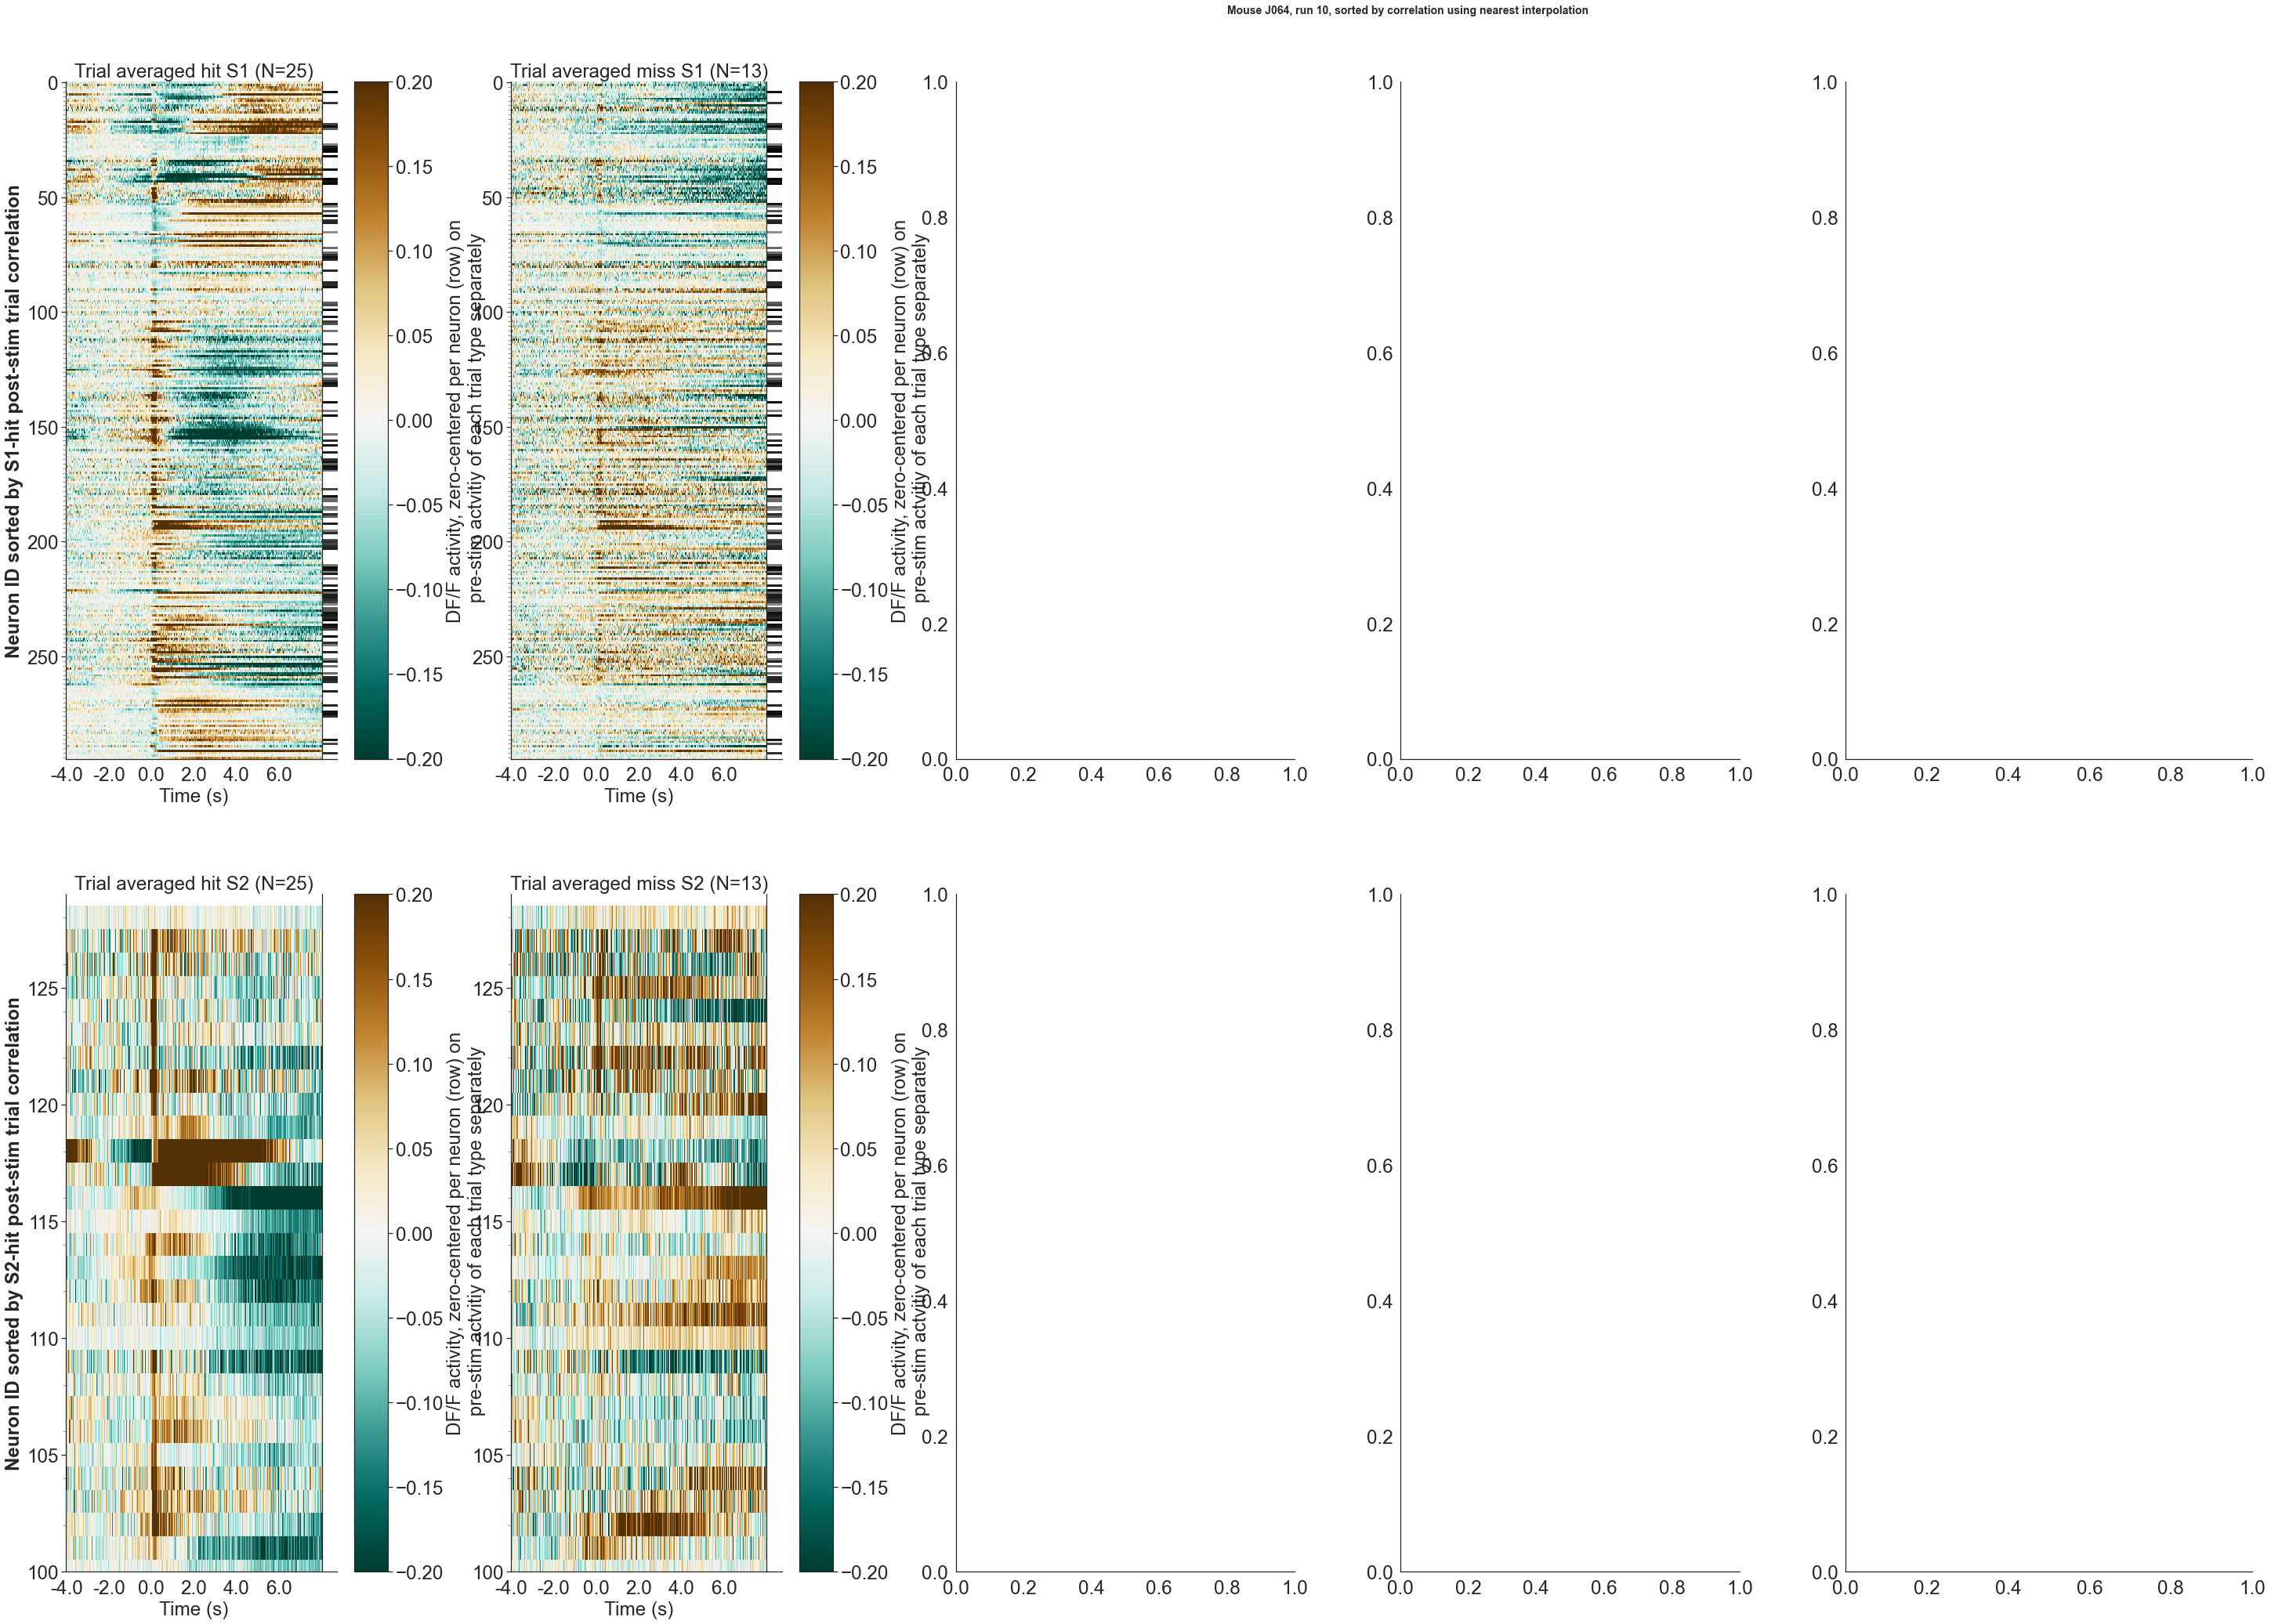

In [39]:
plt.figure(figsize=(100,100))

s2_min = 100
s2_max = 129

_ = pop_off_plotting.plot_raster_plots_trial_types_one_session(session, s2_lim=[s2_min, s2_max])

/home/jrowland/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


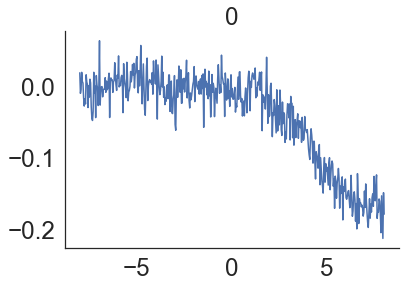

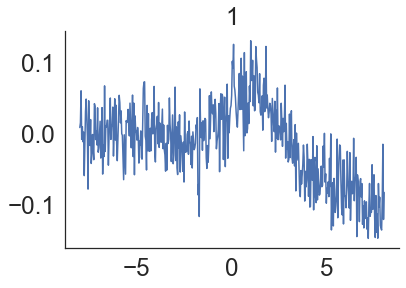

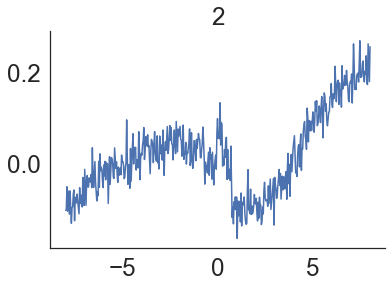

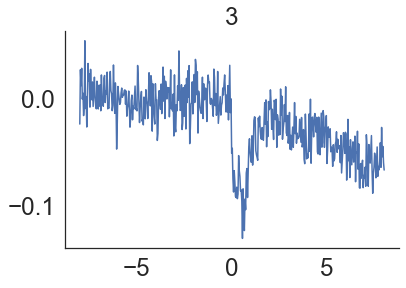

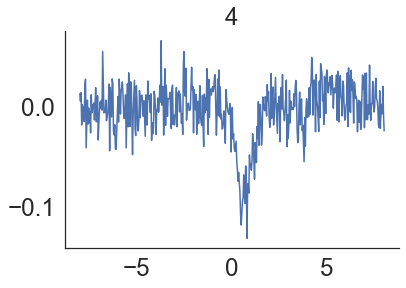

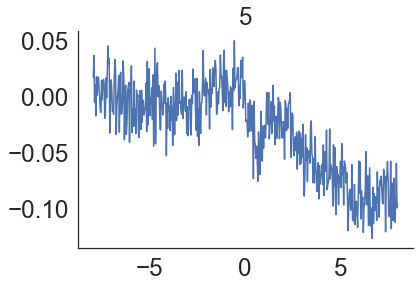

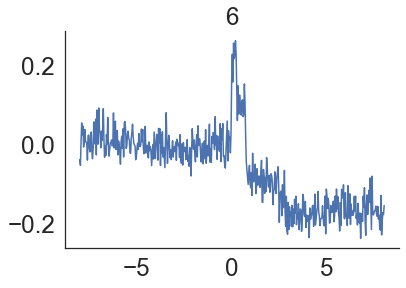

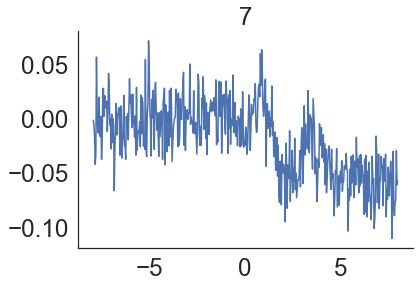

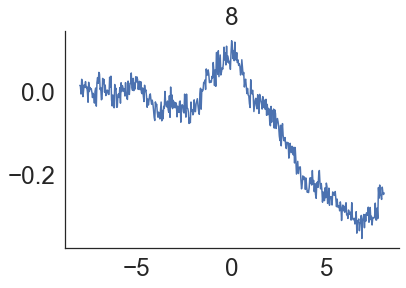

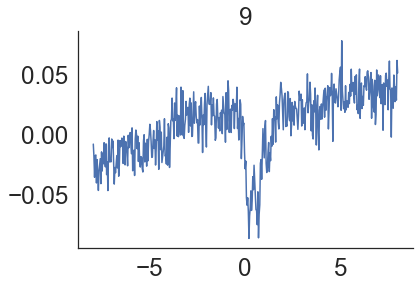

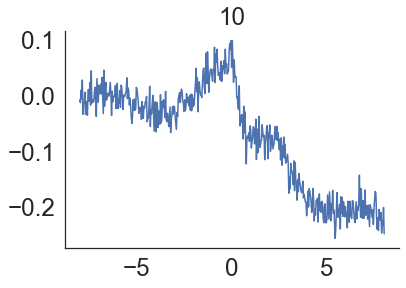

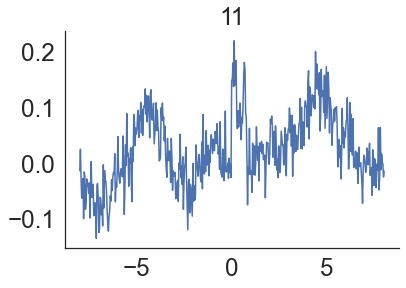

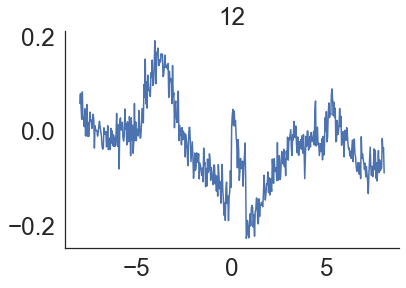

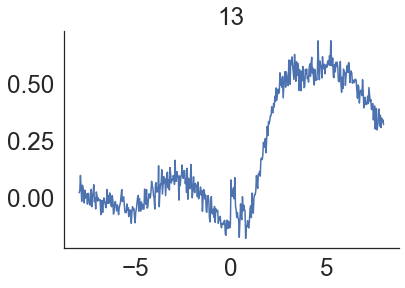

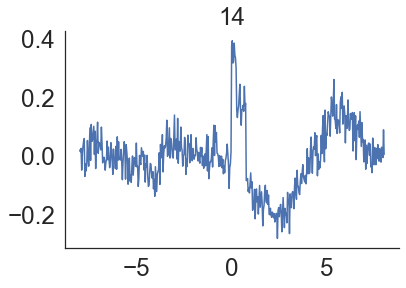

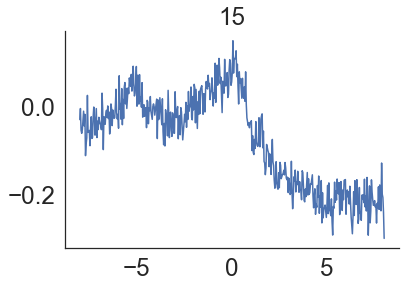

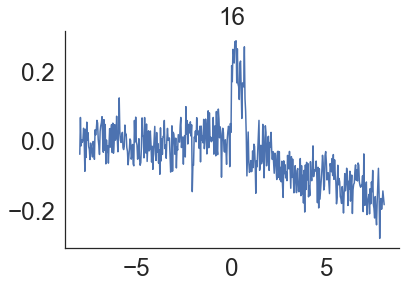

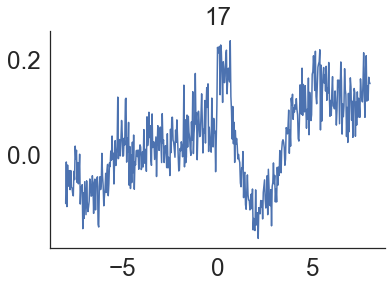

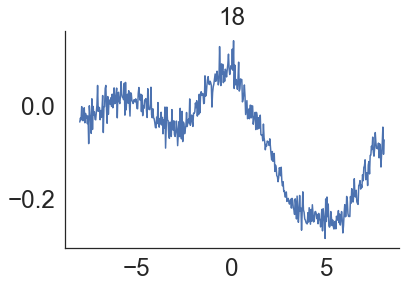

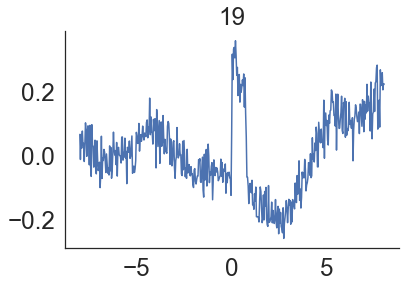

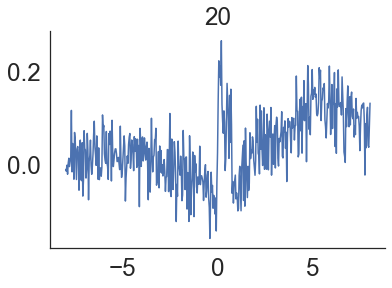

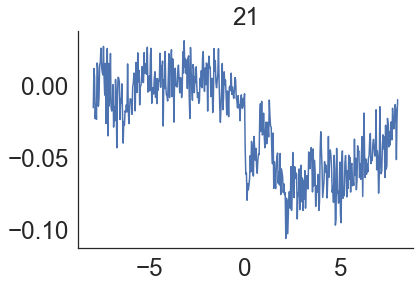

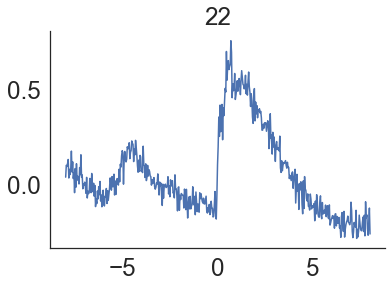

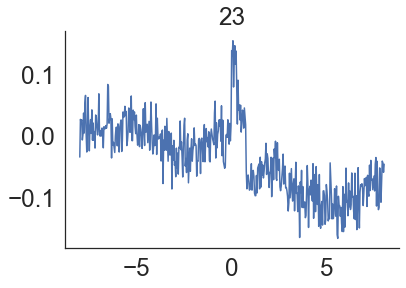

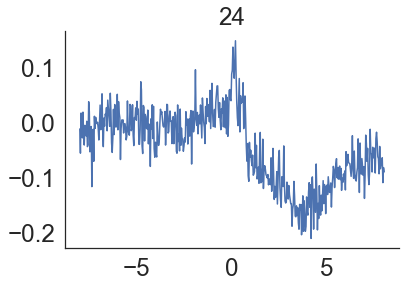

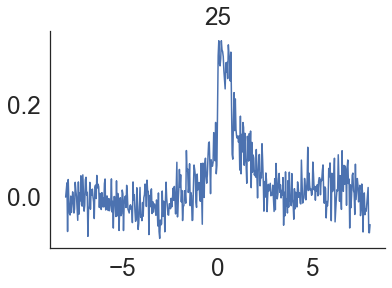

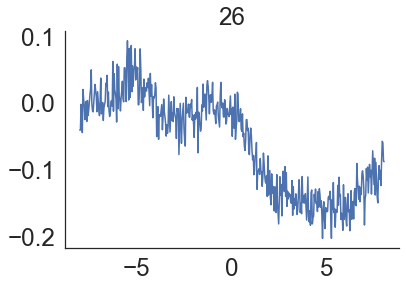

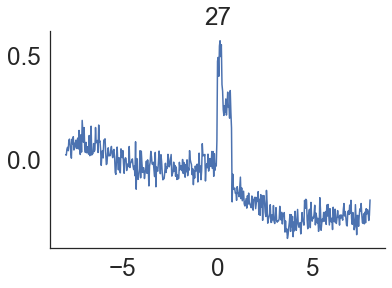

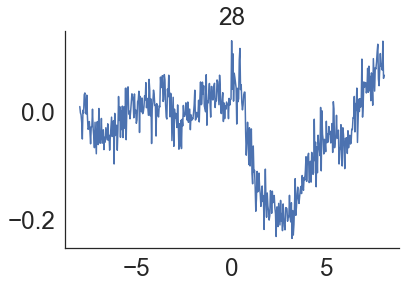

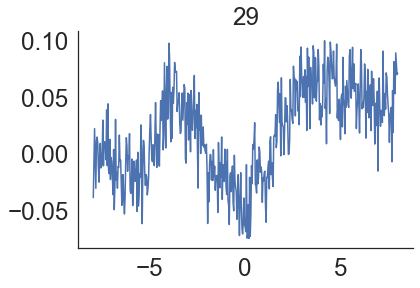

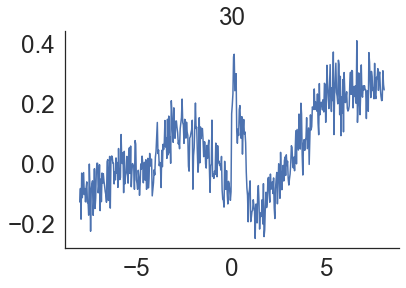

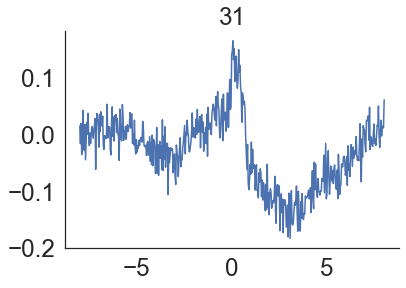

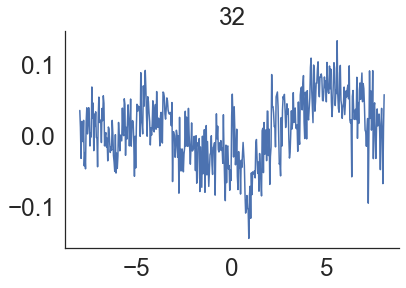

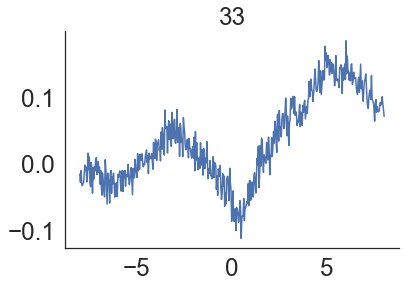

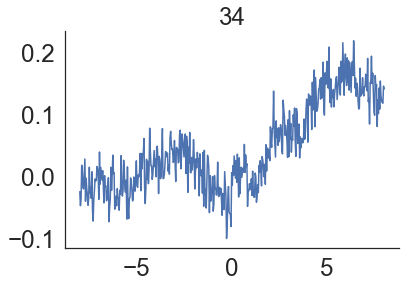

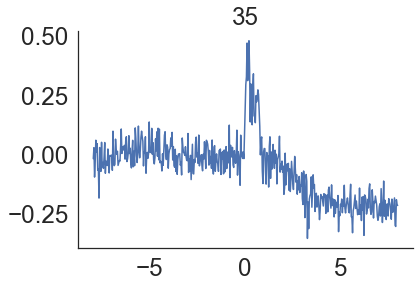

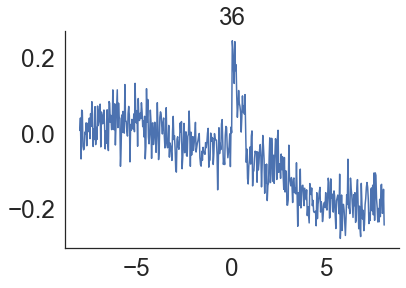

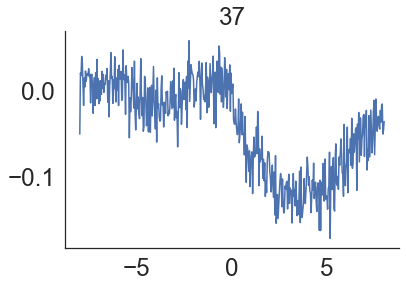

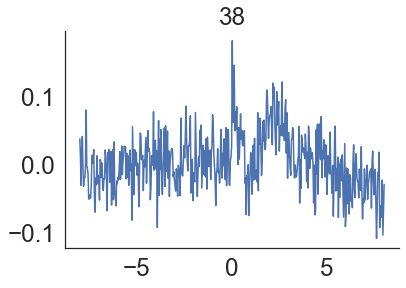

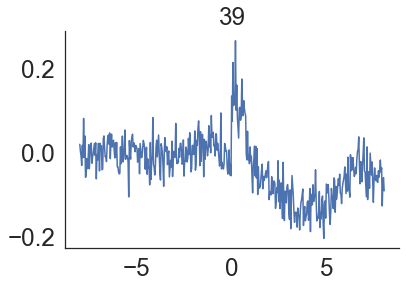

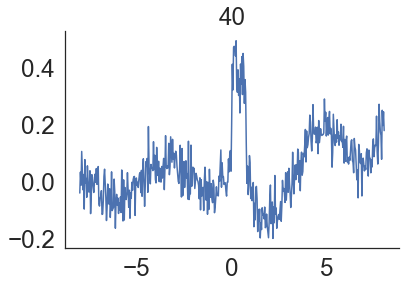

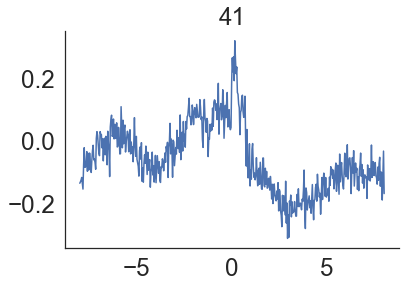

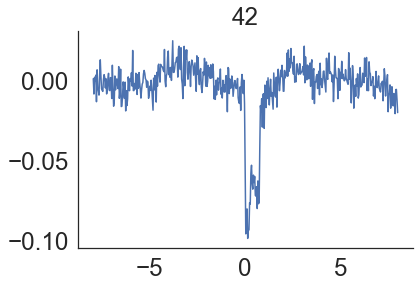

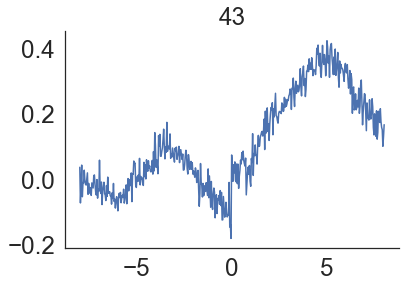

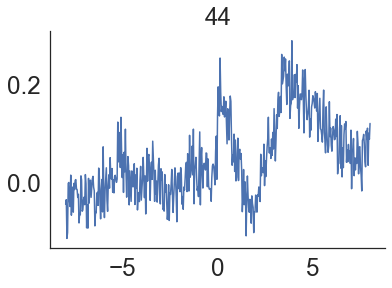

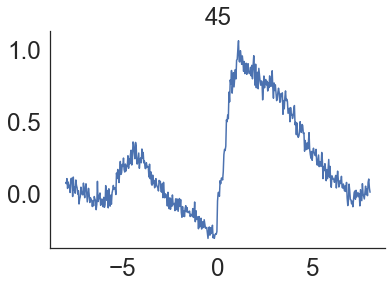

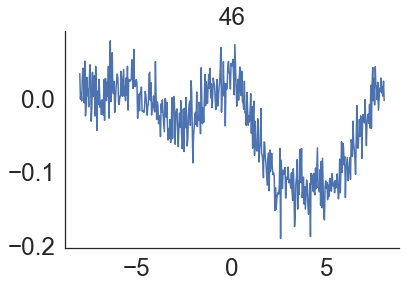

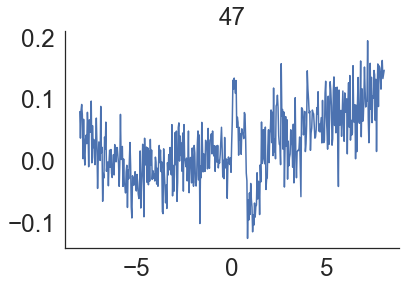

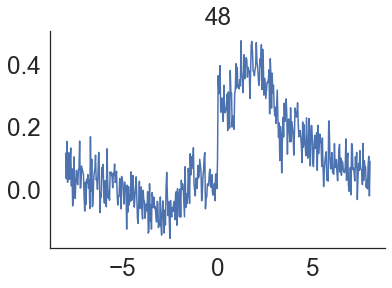

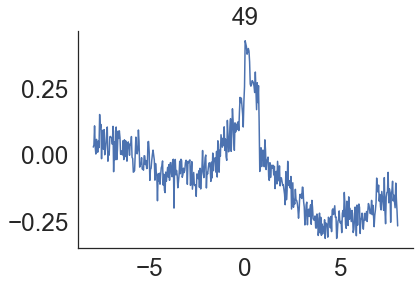

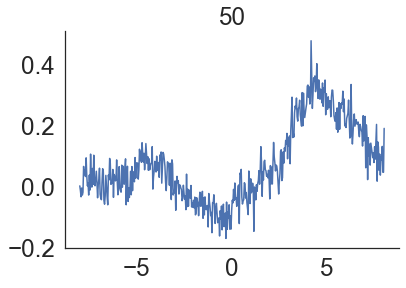

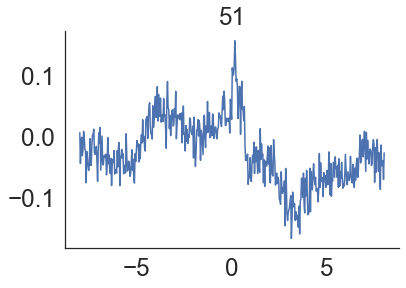

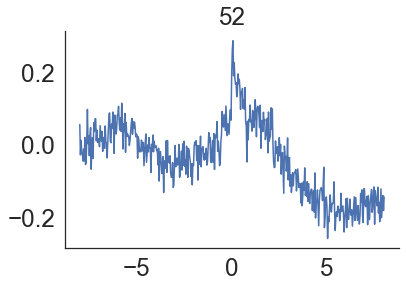

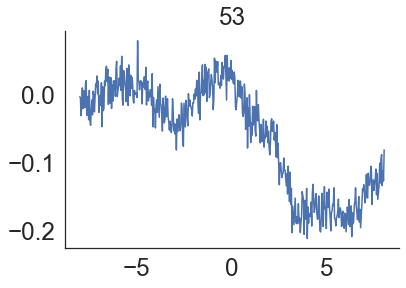

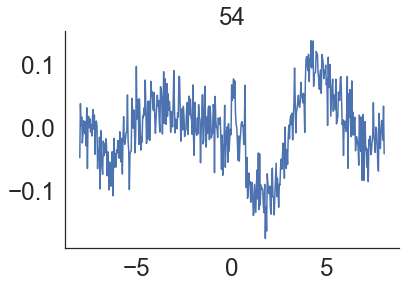

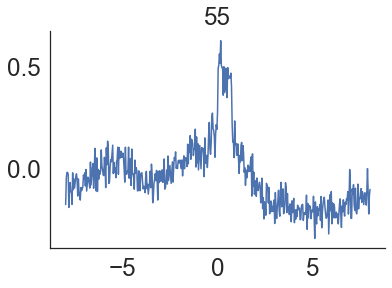

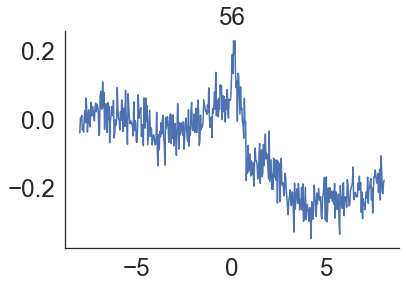

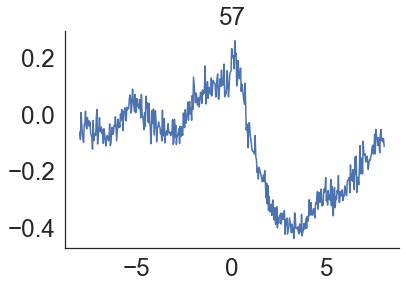

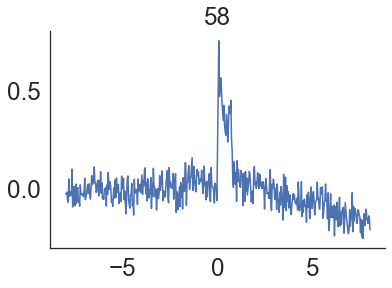

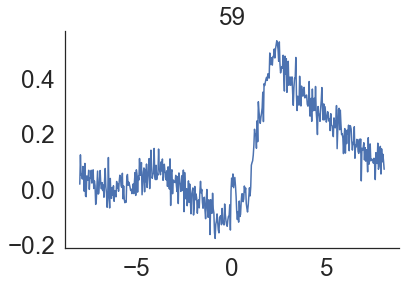

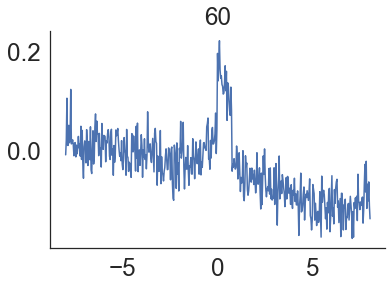

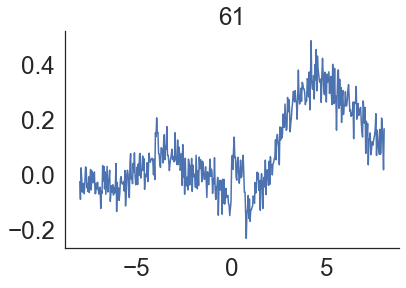

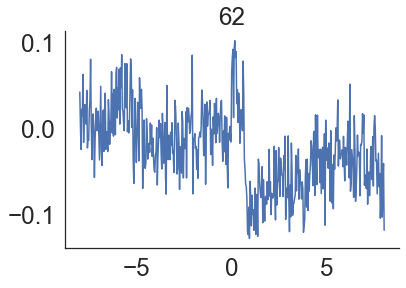

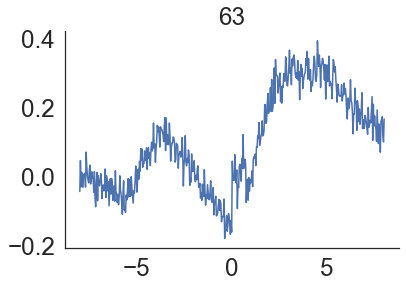

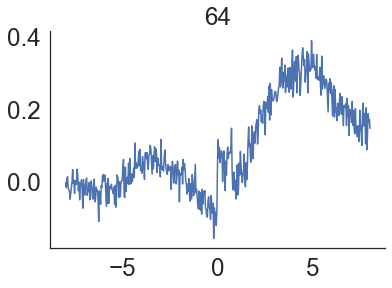

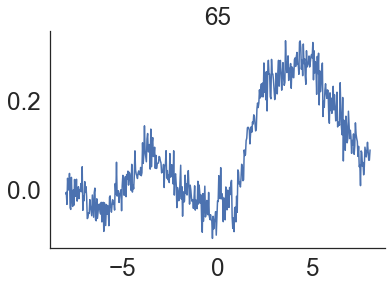

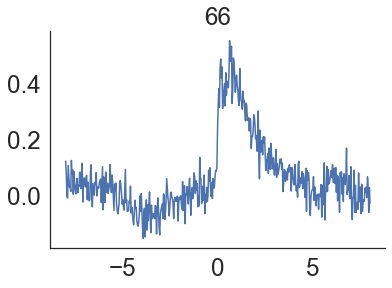

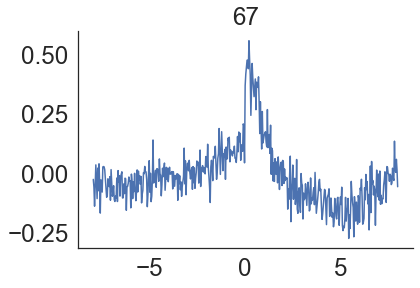

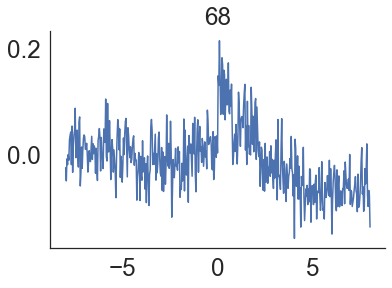

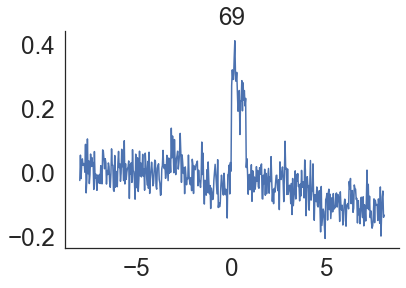

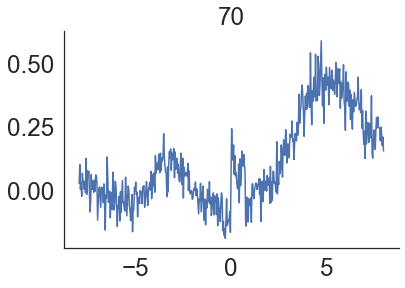

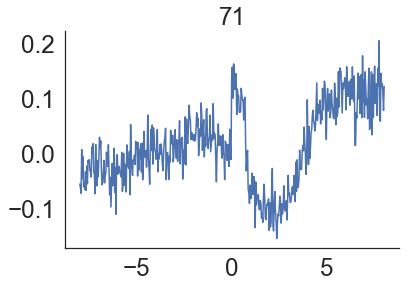

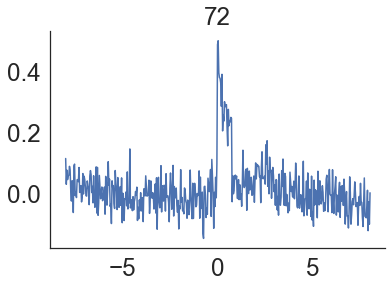

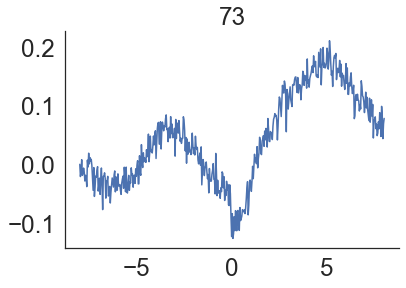

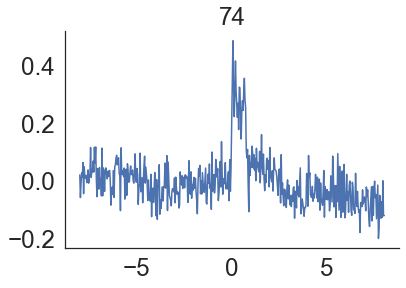

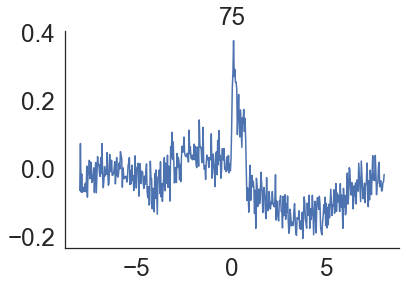

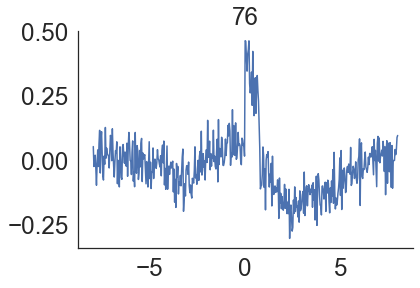

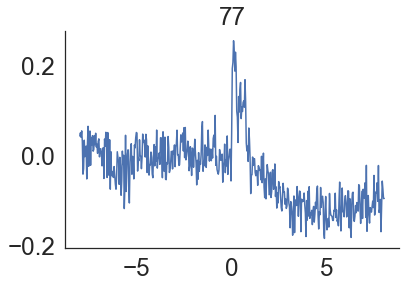

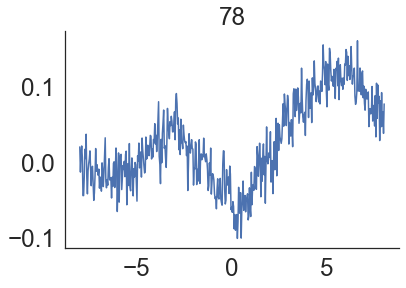

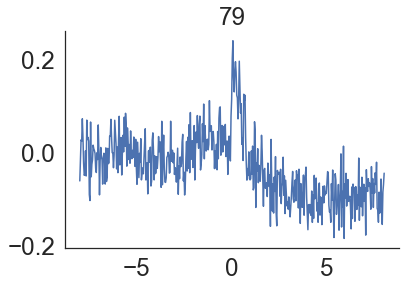

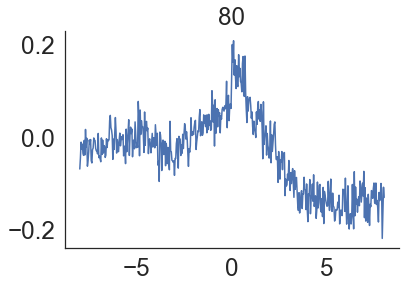

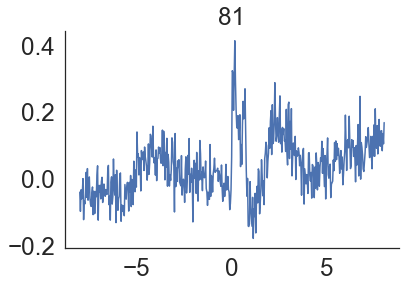

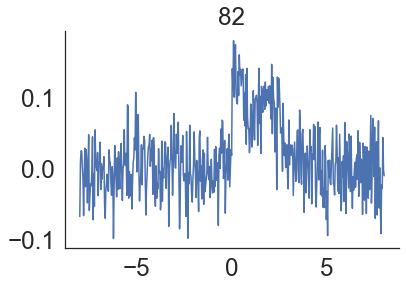

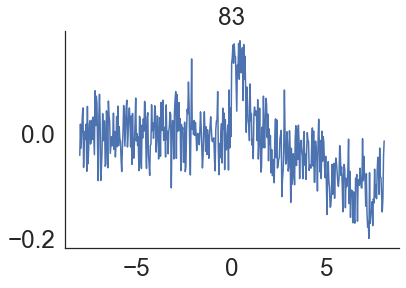

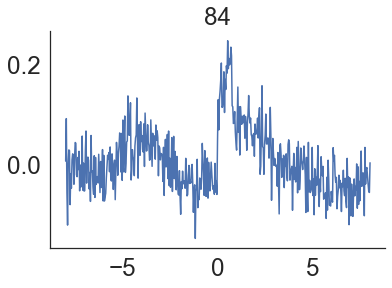

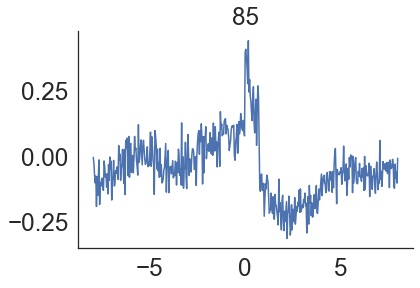

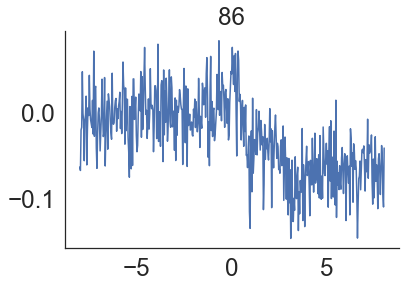

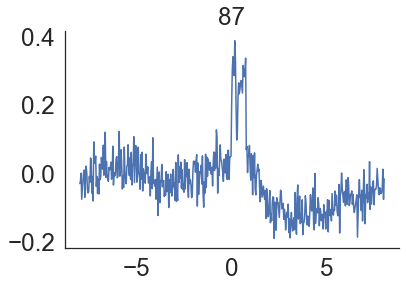

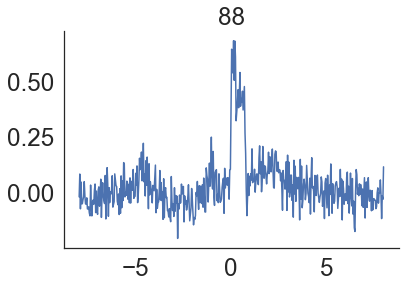

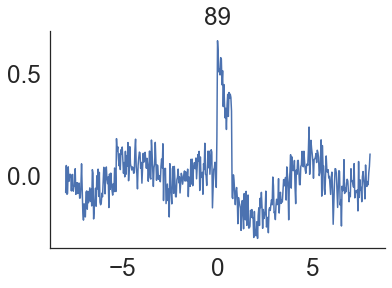

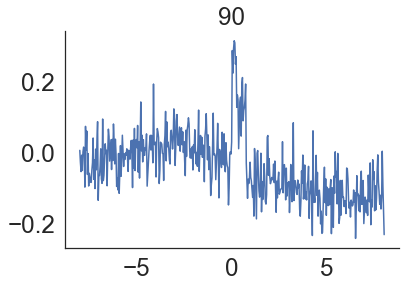

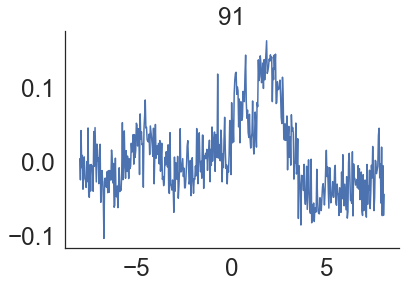

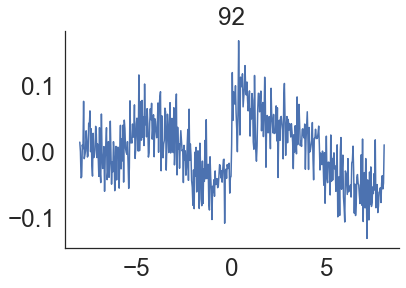

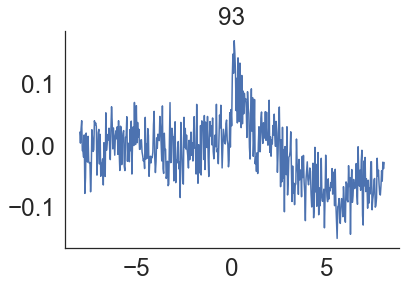

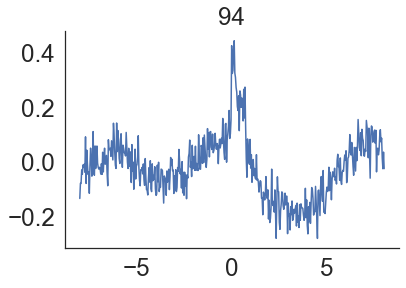

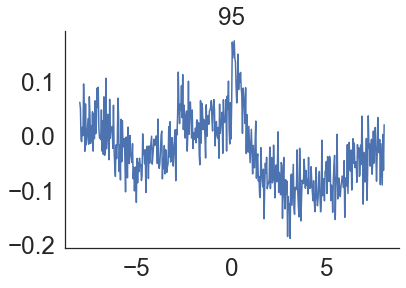

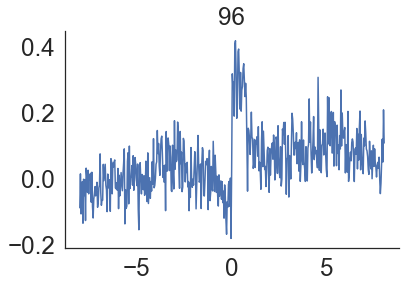

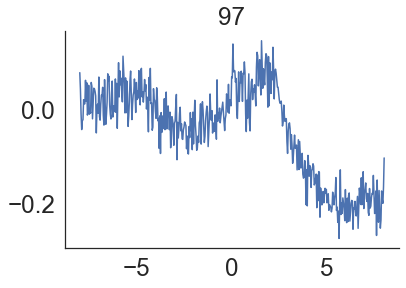

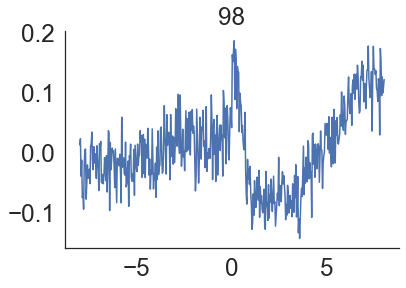

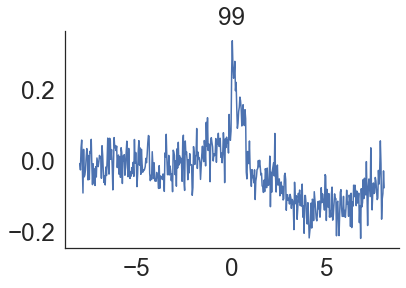

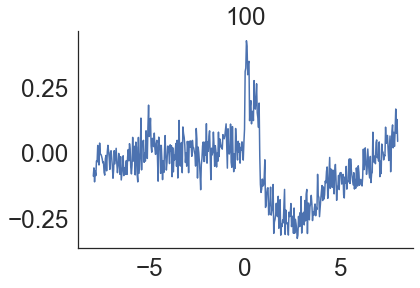

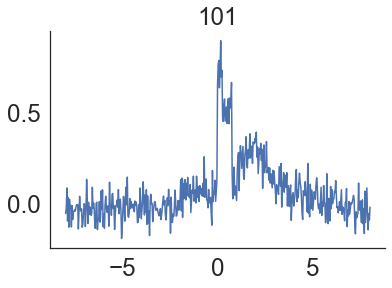

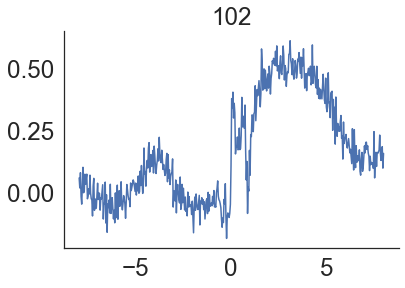

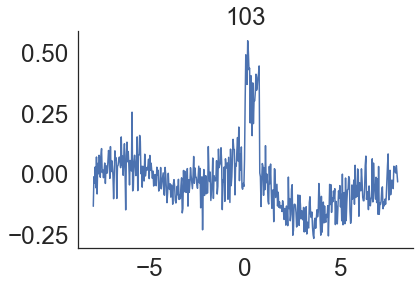

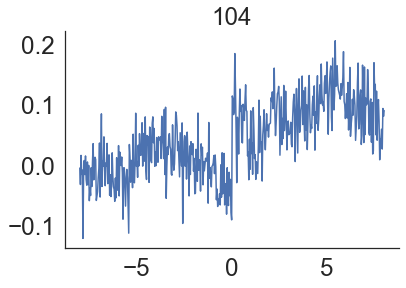

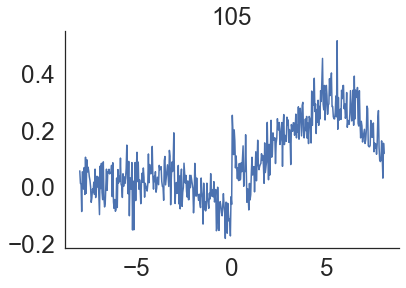

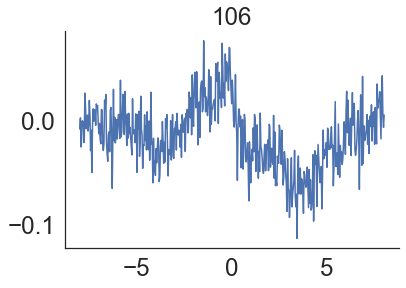

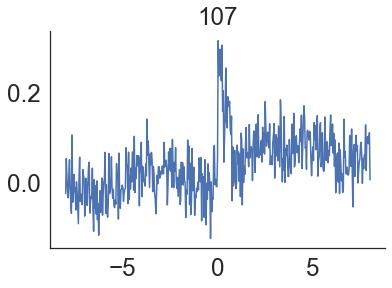

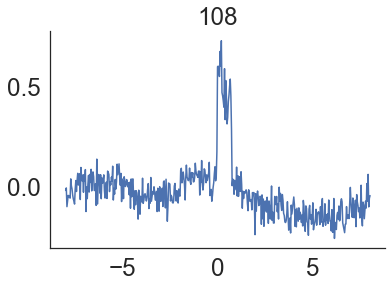

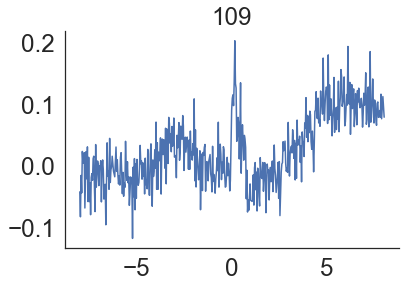

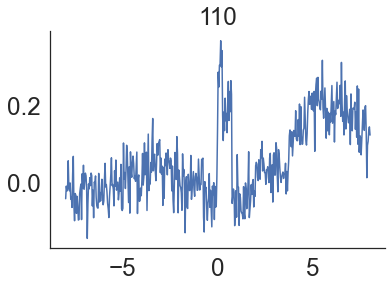

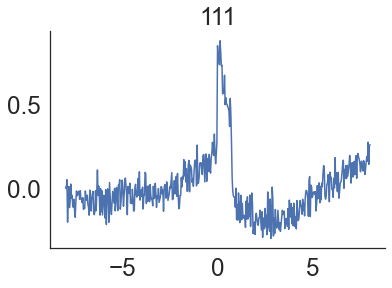

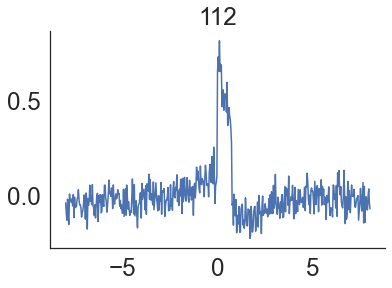

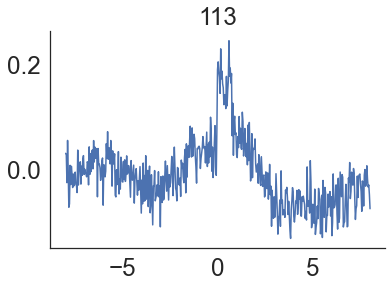

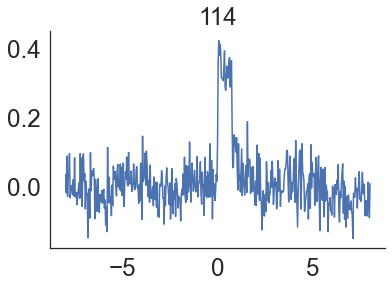

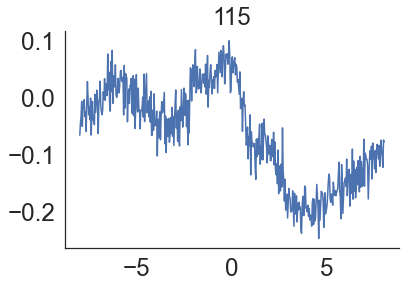

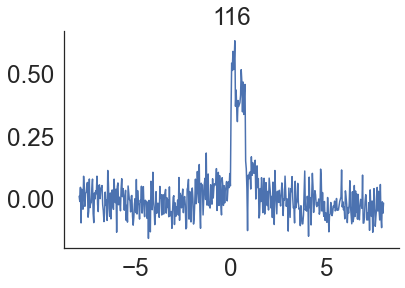

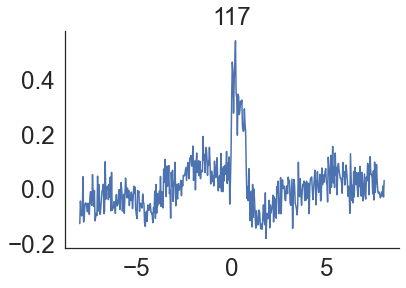

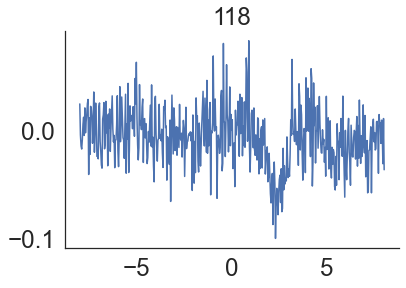

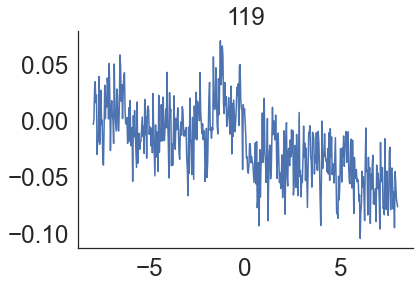

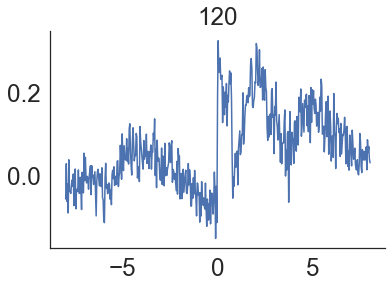

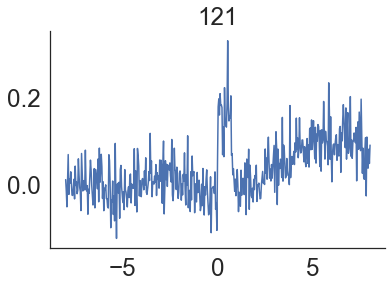

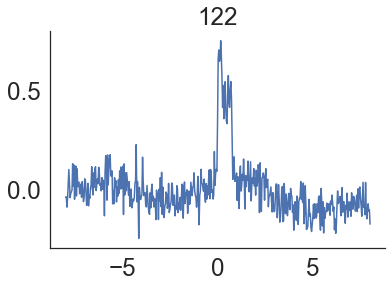

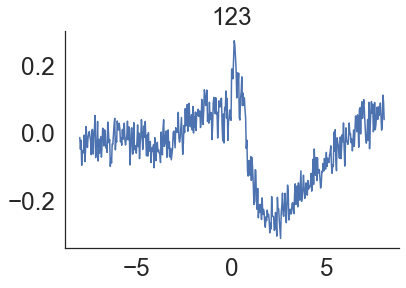

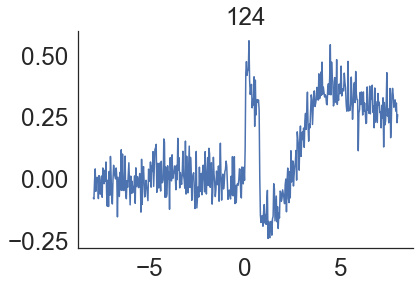

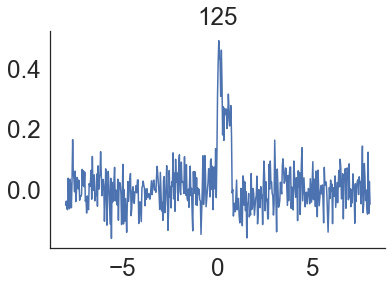

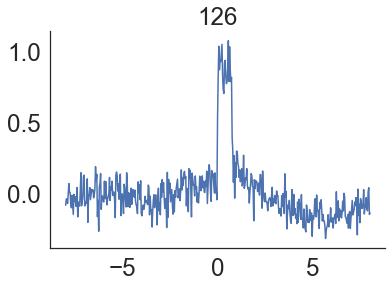

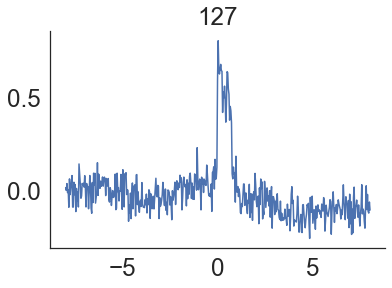

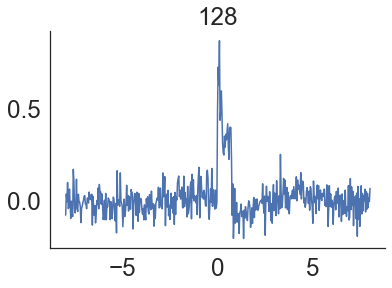

In [11]:

x_axis = session.filter_ps_time
plot_row = 117 # Where is the cell on the plot
for plot_row in np.arange(0,  n_s2):

    # Index of S2 cells in combined matrix
    cell_id = np.where(session.s2_bool)[0][plot_row]
    arr = session.behaviour_trials[cell_id, :, :]
    arr = arr[session.outcome=='hit', :]
    
    baseline = np.mean(arr[:, :session.pre_frames], 1)
    arr = np.subtract(arr.T, baseline).T

    plt.figure()
    plt.title(plot_row)
    
    plt.plot(x_axis, np.mean(arr, 0))

In [141]:
cell_id = np.where(session.s2_bool)[0][10]
cell_id

26

In [45]:
session.__dict__.keys()

dict_keys(['mouse', 'run_number', 'flu_flavour', 'pkl_path', 'pre_seconds', 'post_seconds', 'pre_gap_seconds', 'post_gap_seconds', 'verbose', 'filter_threshold', 'name', 'suite2p_id', 'tstart_galvo', 'trial_start', 'galvo_ms', 'first_lick', 'subsets', 'trial_subsets', 'n_stim_arr', 'outcome', 'outcome_arr', 'frequency', 'pre_frames', 'post_frames', 'art_gap_start', 'final_pre_gap_tp', 'art_gap_stop', 'filter_ps_array', 'filter_ps_time', 'behaviour_trials', 'pre_rew_trials', 'decision', 'photostim', 'photostim_occ', 'autorewarded', 'spiral_lick', 'unrewarded_hits', 'n_unique_stims', 'n_neurons', 'n_times', 'n_trials', 'n_unique_dec', 'occ_table', 'n_com_trials', 'unfiltered_n_cells', 'filtered_neurons', 'n_cells', 'av_ypix', 'av_xpix', 'plane_number', 's1s2_border', 's2_bool', 's1_bool', 'is_target', 'nonnan_trials', 'frames_use', 'tau_dict'])

In [93]:
def single_cell_plot(session, cell_id, tt=['hit'], smooth_window=5):
    
    if tt[0] == 'prereward':
        arr = session.pre_rew_trials[cell_id, :, :]
    else:
        arr = session.behaviour_trials[cell_id, :, :]
        trial_idx = np.logical_and(np.isin(session.outcome, tt), session.photostim==1)
        arr = arr[trial_idx, :]
    
    baseline = np.mean(arr[:, :session.pre_frames], 1)
    arr = np.subtract(arr.T, baseline).T
    
    x_axis = copy.deepcopy(session.filter_ps_time)
    
    remove_photostim = np.logical_or(x_axis < -0.1,
                                     x_axis > 0.5)
    
    x_axis[~remove_photostim] = np.nan
    
    start_box = x_axis[min(np.where(np.isnan(x_axis)))[0]-1]
    end_box = x_axis[max(np.where(np.isnan(x_axis)))[0]]
    end_box = x_axis[max(np.where(np.isnan(x_axis))[0])+1] - 1/30
#     print(start_box)
#     print(end_box)
#     1/0
    

    for trial in arr:
        trial = smooth_trace(trial, smooth_window)
        plt.plot(x_axis, trial, alpha=1)
        
    meaned = smooth_trace(np.mean(arr, 0), smooth_window)
    plt.axvspan(start_box, end_box, alpha=0.5, color=sns.color_palette()[3])
    plt.plot(x_axis, meaned, color='black', linewidth=4)
    plt.xlim(-2, 7)
    
    return arr

(-0.7, 2.8)

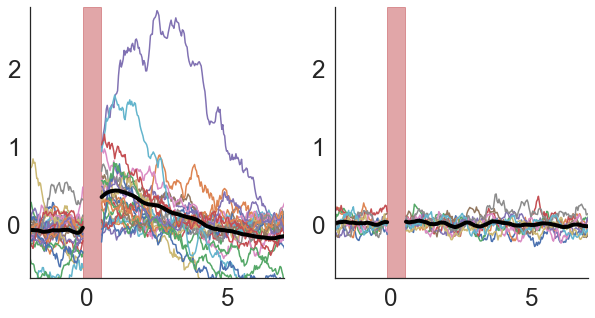

In [94]:
## J064 run 10 cell 77 is a magic cell on hit trials

## 154 is the same but a bit cleaner but 77 doesnt 
## respond to spont rew
cell_id = 77

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
arr = single_cell_plot(session, cell_id,  tt=['hit'])
plt.ylim(-0.7, 2.8)

plt.subplot(1,2,2)
arr = single_cell_plot(session, cell_id,  tt=['prereward'])
plt.ylim(-0.7, 2.8)

(-0.6, 0.8)

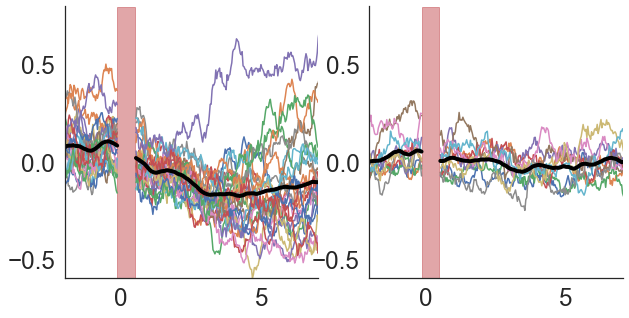

In [150]:
# 403 has a big inhibitory event but also a bit on the spont
# 378 is decent
# 316 is very good but not perfect same with 302
# 192 good


plt.figure(figsize=(10,5))
cell_id = 378

ylims = (-0.6, 0.8)

plt.subplot(1,2,1)
arr = single_cell_plot(session, cell_id, tt=['hit'])
plt.ylim(*ylims)

plt.subplot(1,2,2)
arr = single_cell_plot(session, cell_id, tt=['prereward'])
plt.ylim(*ylims)



In [275]:
def get_percent_cells_responding(session, region, direction='positive', prereward=False):

    # 0.03 gives you 5% of cells responding (positive + negative)
    # on cr
    fdr_rate = 0.03

    if not prereward:
        flu = session.behaviour_trials
    else:
        flu = session.pre_rew_trials
        
    times_use = session.filter_ps_time
    
    if region == 's1':
        flu = flu[session.s1_bool, :, :]
    elif region == 's2':
        flu = flu[session.s2_bool, :, :]
    
    percent_cells_responding = []

    for trial_idx in range(flu.shape[1]):

        # Haven't built this for 5 Hz data
        assert session.mouse not in ['J048', 'RL048']

        trial = flu[:, trial_idx, :]

        # 500 ms before the stim with a nice 
        # juicy buffer to the artifact
        pre_idx = np.where(times_use < -0.07)[0][-15:]  

        # You can dial this back closer to the artifact if you cut out 150
        post_idx = np.logical_and(times_use > 1, times_use <= 1.5)
        
        pre_array = trial[:, pre_idx]
        post_array = trial[:, post_idx]
        
        p_vals = [stats.wilcoxon(pre, post)[1] for pre, post in zip(pre_array, post_array)]
        p_vals = np.array(p_vals)
        
        sig_cells, correct_pval, _, _ = multitest.multipletests(p_vals, alpha=fdr_rate, method='fdr_bh',
                                                            is_sorted=False, returnsorted=False)
        
#         percent_cells_responding.append(sum(sig_cells))
        
        positive = np.mean(post_array, 1) > np.mean(pre_array, 1)
        negative = np.logical_not(positive)
        
        if direction == 'positive':
            percent_cells_responding.append(sum(np.logical_and(sig_cells, positive)))
        else:
            percent_cells_responding.append(sum(np.logical_and(sig_cells, negative)))
        
        
    percent_cells_responding = np.array(percent_cells_responding) / sum(session.s2_bool) * 100
    
    assert len(percent_cells_responding) == flu.shape[1]
    return percent_cells_responding
    

In [263]:
n_responders = get_percent_cells_responding(session, 's2', prereward=True)
np.std(n_responders)

1.2697734511899903

In [223]:
n_responders = get_percent_cells_responding(session, 's2', prereward=False)
np.mean(n_responders[session.outcome=='cr'])

1.255053908355795

In [276]:
def transfer_dict(msm, region, direction='positive'):

    hitty = {}
    missy = {}

    for session_idx in [0, 1, 2, 3, 4]:

        session = msm.linear_models[session_idx].session
        n_responders = get_percent_cells_responding(session, region, direction=direction)

        for n_cells in [[5,10], [20,30], [40,50], 150]:
            idx = np.isin(session.trial_subsets, n_cells)
            idx_miss = np.logical_and(idx, session.outcome=='miss')
            idx_hit = np.logical_and(idx, session.outcome=='hit')

            centre_cells = np.mean(n_cells)

            if centre_cells not in hitty:
                hitty[centre_cells] = [np.mean(n_responders[idx_hit])]
                missy[centre_cells] = [np.mean(n_responders[idx_miss])]
            else:
                hitty[centre_cells].append(np.mean(n_responders[idx_hit]))
                missy[centre_cells].append(np.mean(n_responders[idx_miss]))
        
    return hitty, missy

In [279]:
def plot_transfer_function(data, color):
    
    fit_x = []
    fit_y = []
    
    for key, val in data.items():

        x = np.repeat(key, len(val))
        y = val

        fit_x.extend(x)
        fit_y.extend(y)

        plt.plot(x, y, '.', color=color, markersize=8)

        plt.plot(key, np.nanmean(val), 'ro', color=color, markersize=9)

    fit_x = np.array(fit_x)    
    fit_y = np.array(fit_y)    

    # Need to take a nan out where there's no misses of some cell number
    nn = np.where(~np.isnan(fit_y))
    fit_x = fit_x[nn]
    fit_y = fit_y[nn]

    slope, intercept, r, p, se = stats.linregress(fit_x, fit_y)
    plt.plot(fit_x, fit_x * slope + intercept, color=color)
    
    # plt.xscale('log')

/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/jrowland/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/jrowland/anaconda3/lib/python3.

(-0.09034304511278202, 43.2875100698174)

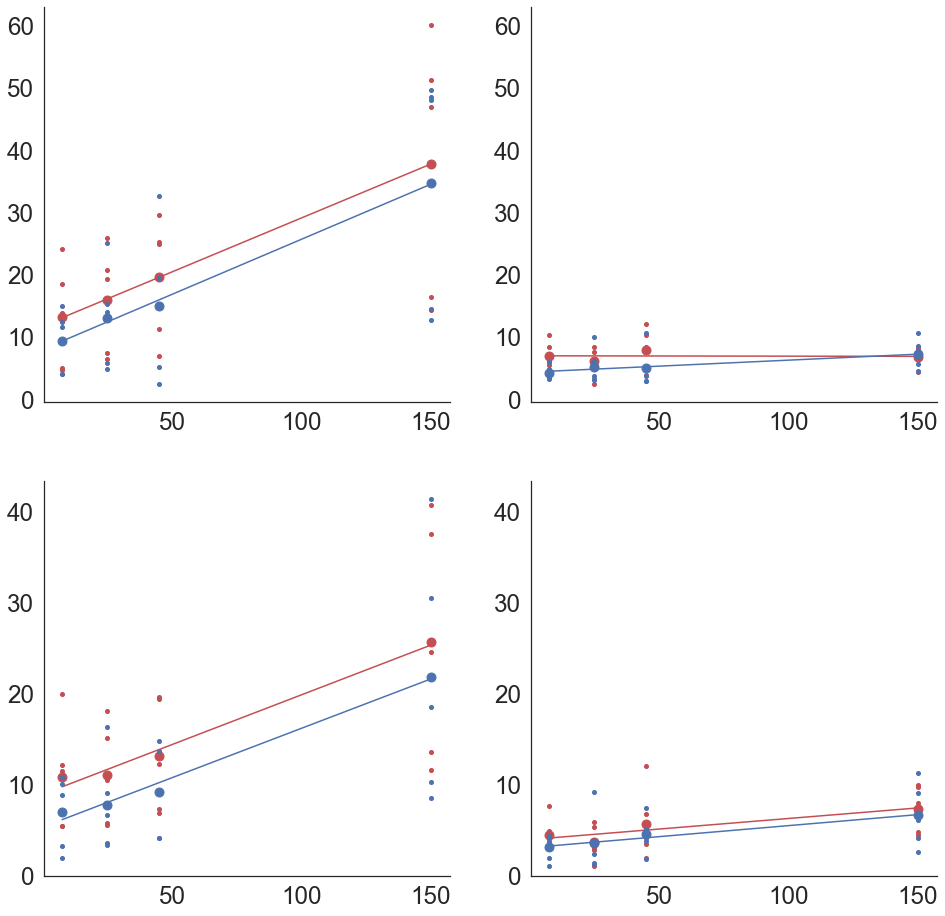

In [289]:
plt.figure(figsize=(16,16))

plt.subplot(2,2,1)
hitty, missy = transfer_dict(msm, 's1', direction='positive')
plot_transfer_function(hitty, color=sns.color_palette()[3])
plot_transfer_function(missy, color=sns.color_palette()[0])

plt.subplot(2,2,2)
hitty, missy = transfer_dict(msm, 's2', direction='positive')
plot_transfer_function(hitty, color=sns.color_palette()[3])
plot_transfer_function(missy, color=sns.color_palette()[0])

plt.subplot(2,2,3)
hitty, missy = transfer_dict(msm, 's1', direction='negative')
plot_transfer_function(hitty, color=sns.color_palette()[3])
plot_transfer_function(missy, color=sns.color_palette()[0])

plt.subplot(2,2,4)
hitty, missy = transfer_dict(msm, 's2', direction='negative')
plot_transfer_function(hitty, color=sns.color_palette()[3])
plot_transfer_function(missy, color=sns.color_palette()[0])


(0.0, 1.0)

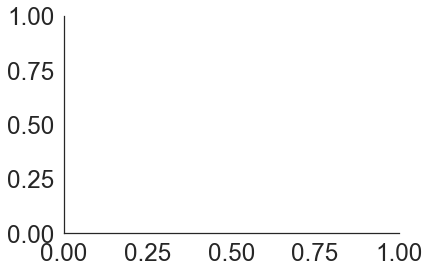

In [278]:
pal = sns.color_palette()
print(pal.as_hex())
pal

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]